<a href="https://colab.research.google.com/github/ShumengJ/ECEGY6143-ML-Archive/blob/main/7_classifiers_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo: Classification of handwritten digits

_Fraida Fund_


In this demo, we will explore the use of several classifiers for classification of handwritten digits. In other words, given an image of a handwritten digit, we want to classify it as a 0, 1, 2, 3, ...


We will compare different techniques for classification of handwritten digits, with a focus on:

* How long it takes to train the model
* How long it takes to make a prediction using the fitted model
* Interpretability of the model


We will use the [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%time` to time how long it takes to fit the model and use the fitted model for predictions. It will tell us:

* the CPU time (amount of time for which a CPU was working on this line of code)
* the wall time (which also includes time waiting for I/O, etc.)

(Note that a related magic command, `%timeit`, tells us how long it takes to run multiple iterations of a line of code. This gives us a much more accurate estimate of the average time. However, since some of the commands we want to time will take a long time to run, we will use the basic `%time` command instead, so that it will be quicker.)


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
  Using cached https://files.pythonhosted.org/packages/d9/3a/eb8d7bbe28f4787d140bb9df685b7d5bf6115c0e2a969def4027144e98b6/scikit_learn-0.23.1-cp36-cp36m-manylinux1_x86_64.whl


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load and prepare data


For this demo, we will use a dataset known as [MNIST](https://en.wikipedia.org/wiki/MNIST_database). It contains 70,000 samples of handwritten digits, size-normalized and centered in a fixed-size image. Each sample is represented as a 28x28 pixel array, so there are 784 features per samples.

We will start by loading the dataset using the `fetch_openml` function. This function allows us to retrieve a dataset by name from [OpenML](https://www.openml.org/), a public repository for machine learning data and experiments.


In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True )

We observe that the data has 784 features and we have 70,000 samples:

In [ ]:
X.shape

(70000, 784)

The target variables is a label for each digit: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9. There are 6000-8000 samples for each class.

In [ ]:
y.shape

(70000,)

In [ ]:
print(y)

['5' '0' '4' ... '4' '5' '6']


In [ ]:
pd.Series(y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [ ]:
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

Each "feature" represents a pixel in the image, and each pixel can take on any integer value from 0 to 255.   A large value for a pixel means that there is writing in that part of the image.



We can see a few examples, by plotting the 784 features as a 28x28 grid. In these images, white pixels indicate high values in the feature matrix.

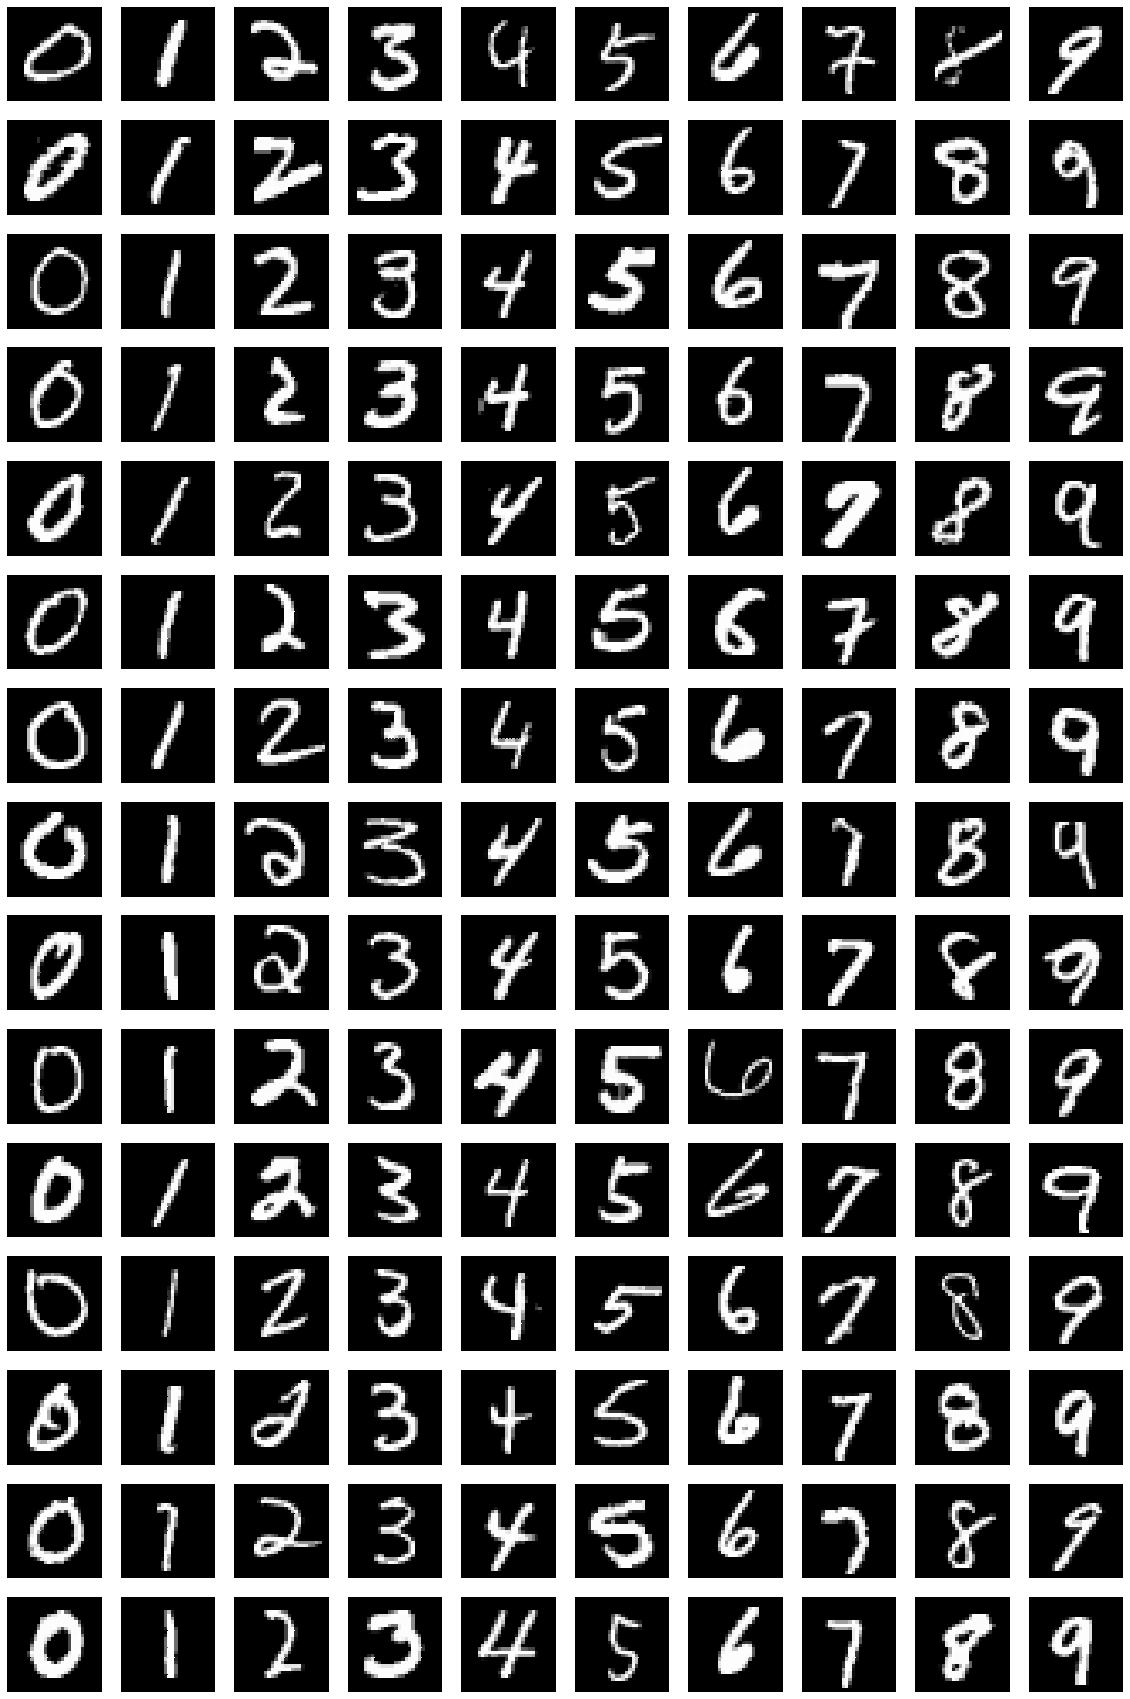

In [ ]:
samples_per_class = 15
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)));

for idx_cls, cls in enumerate(classes):
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray,
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');


Next, we will split our data into a test and training set.

We can use `train_test_split` from `sklearn.model_selection` to split the data.

We will only use a subset of the data, to make the notebook run faster.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9,
                                     train_size=10000, test_size=3000)

We'll also scale the data so that each feature takes on a value between 0 and 1.

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

## Logistic regression for classification of handwritten digits

### Training time

In [ ]:
from sklearn.linear_model import LogisticRegression

cls_lr = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial')


Note that the training time will depend on the allowed tolerance. The logistic regression is fitted using a numerical solver, and the smaller our tolerance, the longer it will run.

In [ ]:
%time cls_lr.fit(X_train, y_train)

CPU times: user 2.25 s, sys: 1.97 ms, total: 2.26 s
Wall time: 2.26 s


LogisticRegression(multi_class='multinomial', penalty='none', solver='saga',
                   tol=0.1)

Once the classifier has been trained (fitted), we can get the coefficient values.

We had 784 features - one for each pixel - so we will have 784 coefficients.
Furthermore, we have 10 classes, so we will have a vector of 784 coefficients for each of the 10 classes.

Therefore, our coefficient matrix has 10 rows and 784 columns:

In [ ]:
cls_lr.coef_.shape

(10, 784)

### Prediction time

In [ ]:
%time y_pred_lr = cls_lr.predict(X_test)

CPU times: user 19.3 ms, sys: 42 ms, total: 61.3 ms
Wall time: 54.9 ms


Let us check the accuracy - what percent of predicted labels are the same as the true labels?

In [ ]:
accuracy = accuracy_score(y_pred_lr, y_test)
print(accuracy)

0.908


### Interpretability

One benefit of logistic regression is its interpretability - we can use the coefficient values to understand what features (i.e. which pixels) are important in determining what class a sample belongs to.



The following plot shows the coefficient vector for each class, with positive coefficients in blue and negative coefficients in red.

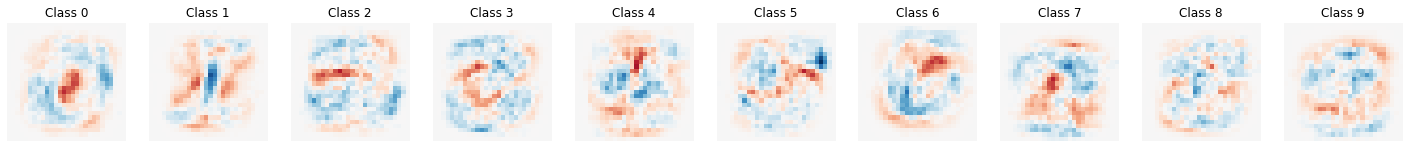

In [ ]:
scale = np.max(np.abs(cls_lr.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(nclasses):
    p = plt.subplot(1, nclasses, i + 1)
    p = plt.imshow(cls_lr.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

We can see which pixels are positively associated with belonging to the class, and which pixels are negatively associated with belonging to the class.

For example, consider the digit 0. If a sample has large values in the pixels shown in blue (the 0 shape around the center of the image), the probability of that sample being a 0 digit increases. If the sample has large values in the pixels in the center of the image, the probability of the sample being a 0 digit decreases.

Many pixels have coefficients whose magnitude are very small. These are shown in white, and they are not very important for this classification task.

## K nearest neighbors for classification of handwritten digits

### Training time

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

cls_knn = KNeighborsClassifier(n_neighbors=3)
%time cls_knn.fit(X_train, y_train)

CPU times: user 1.18 s, sys: 0 ns, total: 1.18 s
Wall time: 1.18 s


KNeighborsClassifier(n_neighbors=3)

### Prediction time

In [ ]:
%time y_pred_knn = cls_knn.predict(X_test)

CPU times: user 56.7 s, sys: 14.8 ms, total: 56.7 s
Wall time: 56.8 s


In [ ]:
acc = accuracy_score(y_test, y_pred_knn)
acc

0.9513333333333334

### Interpretability

To interpret the model output, we can examine the neighbors used to classify any test  sample.

Here, we'll look at a few misclassified samples (top row), their nearest neighbors, and the distance to those neighbors.

In [ ]:
n_samples = 5
n_neighbors = 3

In [ ]:
idx_mis = np.where(y_pred_knn!=y_test)
random_idx_mis = np.random.choice(idx_mis[0], size=5, replace=False)
distances_mis, neighbor_idx_mis = cls_knn.kneighbors(X_test[random_idx_mis])

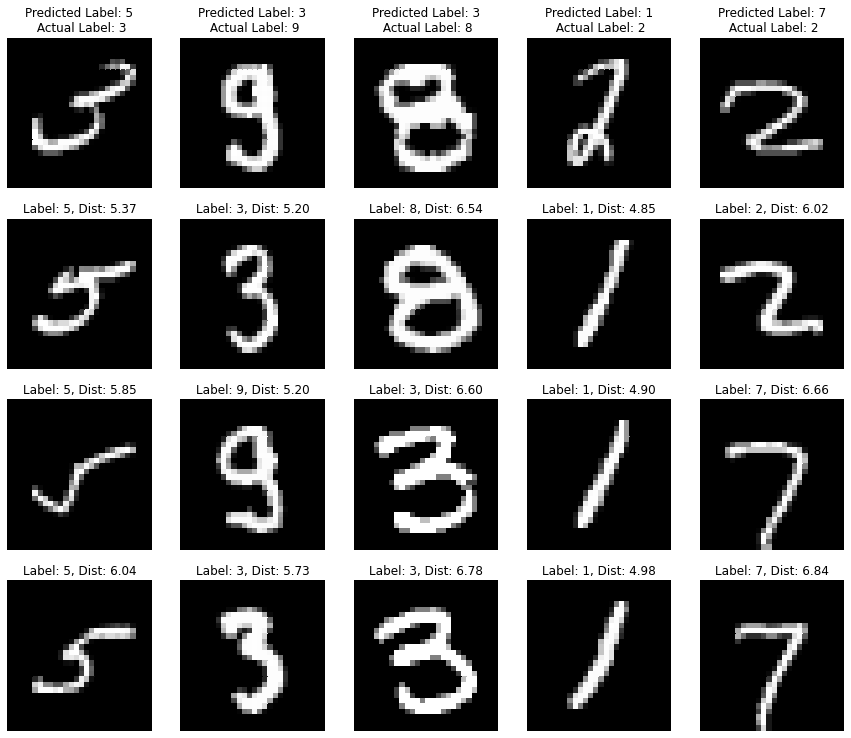

In [ ]:
p = plt.figure(figsize=(3*n_samples,4.25*n_neighbors));
for i, index in enumerate(random_idx_mis):
  image = X_test[index]
  true_label = y_test[index]
  pred_label = y_pred_knn[index]
  p = plt.subplot(1+n_neighbors, n_samples, i + 1);
  p = sns.heatmap(np.reshape(image, (28,28)), cmap=plt.cm.gray,
                    xticklabels=False, yticklabels=False, cbar=False);
  p = plt.title('Predicted Label: %s\n Actual Label: %s' %
                (pred_label, true_label));
  for n in range(n_neighbors):
    neighbor_index = neighbor_idx_mis[i][n]
    neighbor_image = X_train[neighbor_index]
    true_label = y_train[neighbor_index]
    dist = distances_mis[i][n]
    p = plt.subplot(1+n_neighbors, n_samples, (1+n)*n_samples + (i+1));
    p = sns.heatmap(np.reshape(neighbor_image, (28,28)), cmap=plt.cm.gray,
                    xticklabels=False, yticklabels=False, cbar=False);
    p = plt.title('Label: %s, Dist: %s' %
                (true_label, "{:.2f}".format(dist)));


## Support vector machine for classification of handwritten digits

### Training time

In [ ]:
from sklearn.svm import SVC

cls_svc = SVC(kernel='rbf', C=10, gamma='scale')

In [ ]:
%time cls_svc.fit(X_train, y_train)

CPU times: user 36.2 s, sys: 10.9 ms, total: 36.2 s
Wall time: 36.2 s


SVC(C=10)

### Prediction time

In [ ]:
%time y_pred_svc = cls_svc.predict(X_test)

CPU times: user 16.3 s, sys: 7.01 ms, total: 16.3 s
Wall time: 16.4 s


In [ ]:
accuracy = accuracy_score(y_pred_svc, y_test)
print(accuracy)

0.9716666666666667


### Interpretability

The decisions of the SVM are a little bit more complicated to interpret, but we can get some insight by looking at the support vectors.



First, we can find out the number of support vectors for each class, and get their indices:

In [ ]:
idx_support = cls_svc.support_
cls_svc.n_support_

array([299, 205, 421, 421, 421, 473, 326, 354, 476, 454], dtype=int32)

Then, we can plot a random subset of support vectors for each class:

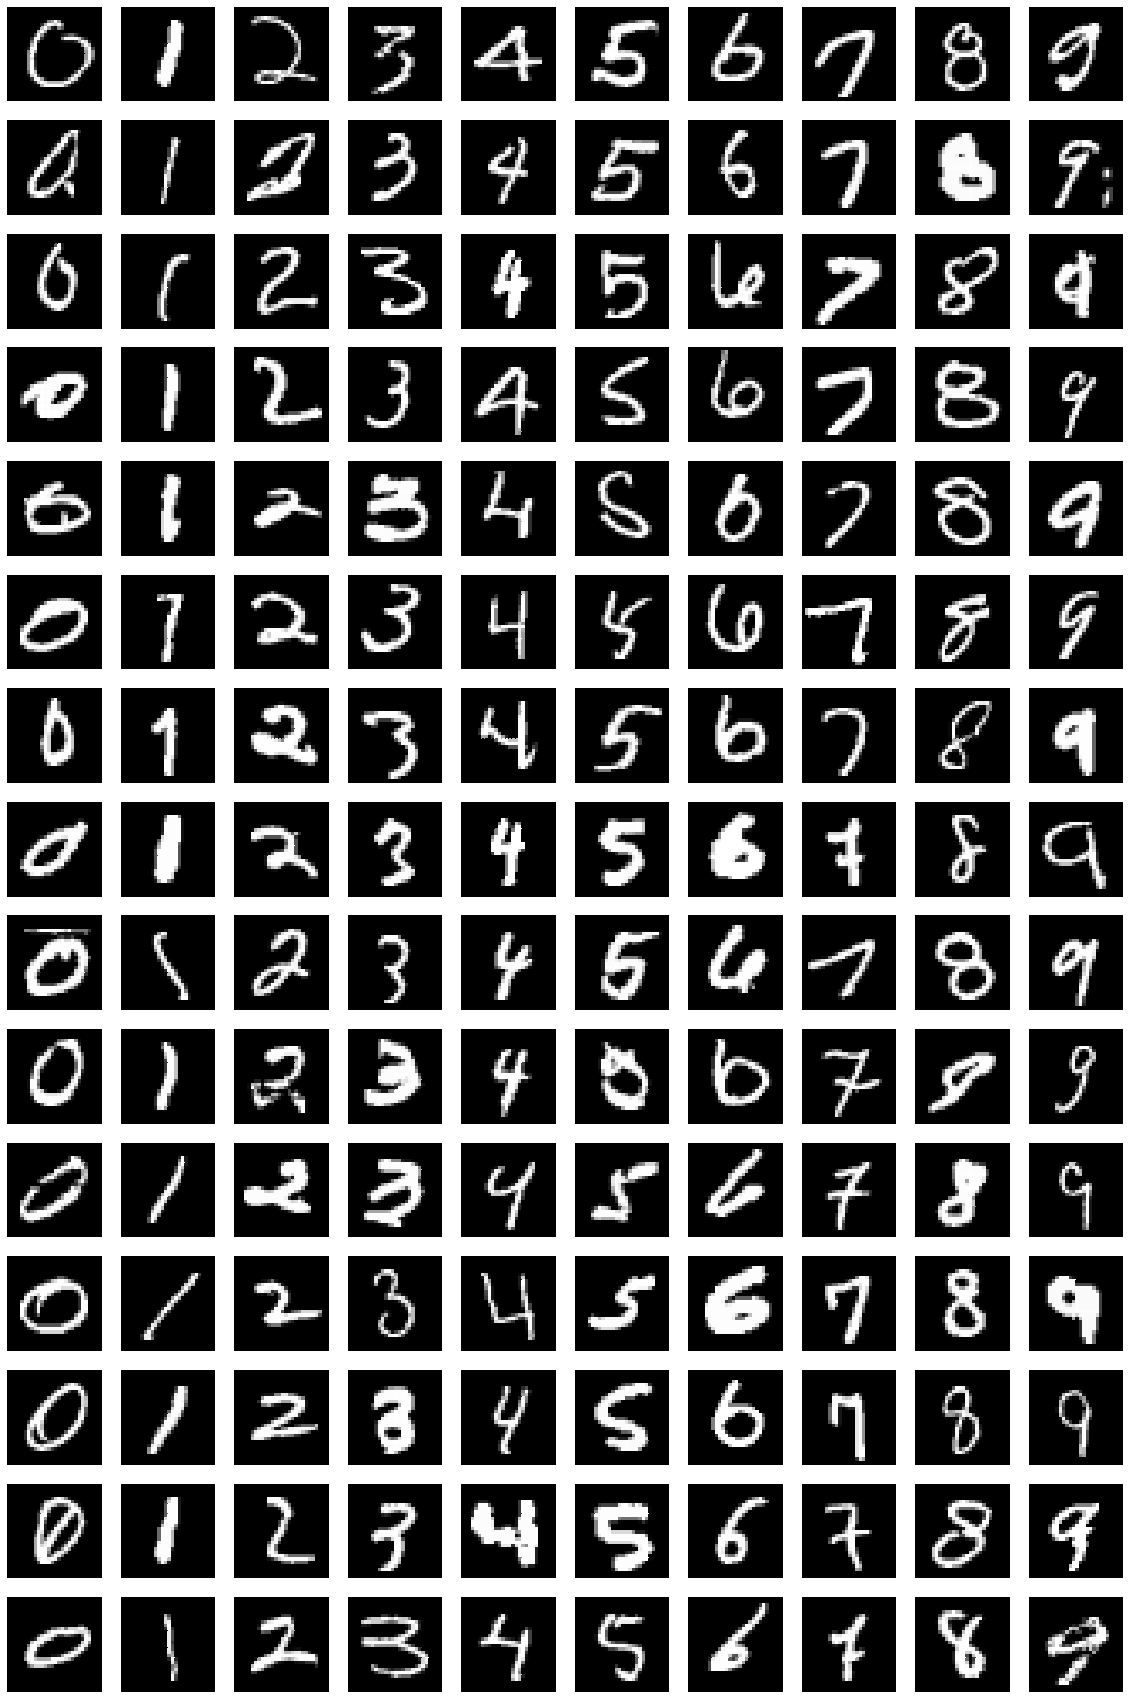

In [ ]:
num_classes = len(cls_svc.classes_)
m = np.insert(np.cumsum(cls_svc.n_support_), 0, 0)
samples_per_class = 15
figure = plt.figure(figsize=(num_classes*2,(1+samples_per_class*2)));
for y, cls in enumerate(cls_svc.classes_):
  idxs = np.random.choice(idx_support[m[y]:m[y+1]], samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + y + 1
    p = plt.subplot(samples_per_class, num_classes, plt_idx);
    p = sns.heatmap(np.reshape(X_train[idx], (28,28)), cmap=plt.cm.gray,
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');

You may notice that the support vectors include many atypical examples of the digits they represent.

Equivalently, the support vectors include examples that are more likely than most training samples to be confused with another class (for example, look at the accuracy of the logistic regression on the entire training set, and on just the support vectors!). Why?

In [ ]:
cls_lr.score(X_train, y_train)

0.9321

In [ ]:
cls_lr.score(X_train[idx_support], y_train[idx_support])

0.825974025974026

It's easier to understand the decisions of the SVM for a binary classification problem, so to dig deeper into the interpretability, we'll consider the the binary classification problem of distinguishing between '5' and '6' digits.

In [ ]:
X_train_bin = X_train[np.isin(y_train, ['5','6'])]
y_train_bin = y_train[np.isin(y_train, ['5','6'])]

In [ ]:
X_test_bin = X_test[np.isin(y_test, ['5','6'])]
y_test_bin = y_test[np.isin(y_test, ['5','6'])]

We'll fit an SVM classifier on the 5s and 6s:

In [ ]:
gamma = 0.01

cls_svc_bin = SVC(kernel='rbf', C=10, gamma=gamma)
cls_svc_bin.fit(X_train_bin, y_train_bin)

SVC(C=10, gamma=0.01)

And then use it to make predictions:

In [ ]:
y_pred_bin = cls_svc_bin.predict(X_test_bin)

In [ ]:
accuracy_score(y_test_bin, y_pred_bin)

0.9889908256880734

We will choose one test sample to explore in depth.

We'll use one that was misclassified:

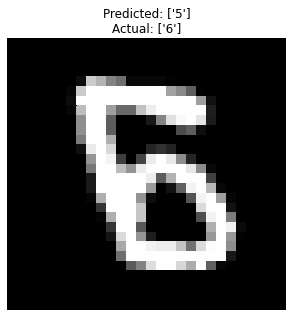

In [ ]:
idx_mis = np.where(y_pred_bin!=y_test_bin)[0]
idx_test = np.random.choice(idx_mis, size=1)

plt.figure(figsize=(5,5));

sns.heatmap(np.reshape(X_test_bin[idx_test], (28,28)), cmap=plt.cm.gray,
             xticklabels=False, yticklabels=False, cbar=False);
plt.title("Predicted: %s\nActual: %s" % (y_pred_bin[idx_test],y_test_bin[idx_test]));

Now, let's see how the SVM made its decision for this test point $\mathbf{x_t}$, by computing

$$w_0 + \sum_{i \in S} \alpha_i y_i \sum_{j=1}^p  x_{ij}, x_{tj}$$


where $S$ is the set of support vectors. (Recall that $\alpha_i = 0$ for any point that is not a support vector.)


First, we need $x_i$ for $i \in S$.

We use `support_` to get the indices of the support vectors (in the training set) and `n_support_` to get the number of support vectors for each class.

In [ ]:
idx_support = cls_svc_bin.support_
print(idx_support.shape)
print(cls_svc_bin.n_support_)

(257,)
[131 126]


Next, for each class ($+$ and $-$), we will find:

* the support vectors for that class, $x_i$  
* the values of the dual coefficients $\alpha_i$ for each support vector for that class. Actually, the SVM model returns $\alpha_i y_i$, but that's fine, too.

In [ ]:
n_support_c1 = cls_svc_bin.n_support_[0]
idx_support_c1 = idx_support[0:n_support_c1]
dual_coef_c1 = cls_svc_bin.dual_coef_[:,0:n_support_c1]

In [ ]:
n_support_c2 = n_support_c1 + cls_svc_bin.n_support_[1]
idx_support_c2 = idx_support[n_support_c1:n_support_c1+n_support_c2]
dual_coef_c2 = cls_svc_bin.dual_coef_[:, n_support_c1:n_support_c1+n_support_c2]

A brief digression - recall that the solution to the dual SVM problem is

\begin{aligned}
\max_\alpha \quad & - \sum_{i=1}^n \alpha_i - \sum_{i,j = 1}^{n} y_i y_j \alpha_i \alpha_j K( x_i, x_j) \\
\text{s.t.} \quad & 0 \leq \alpha_i \leq C, \quad i = 1,2,\ldots,n.
\end{aligned}

so each $\alpha_i$ will be between $0$ and $C$. The `dual_coef_` array returns by the SVM model in `sklearn` is $\alpha_i y_i$, so the coefficients will be negative for the negative class and positive for the positive class, but you should see that the magnitudes are always between $0$ and $C$.

In [ ]:
dual_coef_c1

array([[ -0.12303543,  -0.78514975,  -0.11393933,  -1.24744896,
         -1.82678499,  -0.8810444 ,  -3.0249162 ,  -0.98268844,
         -2.70663423,  -1.07067633,  -1.89151852,  -0.86314898,
         -1.8364084 ,  -2.05593296,  -0.22931917,  -1.02171615,
         -2.07551927,  -0.14726607,  -2.41707232,  -0.48414031,
         -0.23737969, -10.        ,  -0.84690347,  -1.02233969,
         -1.12891924,  -1.53333951,  -0.04055679,  -0.5297646 ,
         -1.52212733,  -1.29507267,  -1.32883639,  -3.142644  ,
         -0.1957034 ,  -1.36068991,  -0.34181411,  -5.21939728,
         -0.74282343,  -4.16489618,  -1.20813405,  -7.37886238,
         -0.28912605,  -1.57361415,  -0.34576065,  -0.01804155,
         -0.05045036,  -3.75728494,  -0.93494135,  -5.32142002,
         -0.13119604,  -2.84684244,  -2.76206981,  -0.2145465 ,
         -0.46602103,  -1.08950908,  -0.2058281 ,  -4.86025259,
         -4.13354258,  -0.13130347,  -2.06129158,  -0.43194022,
         -0.38077853,  -3.96377496,  -0.

In [ ]:
dual_coef_c2

array([[0.84043499, 2.30243457, 0.14089434, 0.20805539, 0.03744273,
        3.35389115, 0.33506544, 1.2896019 , 1.6493419 , 2.54130118,
        0.9828962 , 0.31037346, 0.81413558, 0.32264364, 0.19465012,
        0.26210055, 1.01685431, 1.87686264, 4.00706851, 2.82738309,
        7.07903866, 0.20943695, 0.10721153, 5.95244812, 1.27216802,
        0.11527603, 0.97123161, 0.70024833, 1.21878297, 0.82712412,
        1.32890129, 0.83169672, 3.59832999, 2.07736887, 1.3846741 ,
        5.60295346, 2.4519828 , 0.00974113, 2.16367843, 1.95076268,
        3.36283374, 1.11363197, 1.35838117, 0.34656704, 0.84600668,
        1.17882011, 1.35021777, 1.25840574, 0.92078591, 0.47211446,
        0.76495957, 2.87438004, 1.21881539, 0.21135718, 0.71911408,
        1.99870057, 0.77083986, 1.45200126, 1.40154889, 1.43125014,
        4.67854966, 1.08864381, 0.19653374, 0.79755495, 3.9167847 ,
        1.81066305, 0.0544763 , 3.10998331, 0.88045334, 2.99930664,
        0.97169743, 0.67060384, 1.93412804, 3.49

Finally, we need $K(x_i, x_{\text{test}})$ for each support vector in the positive class, and each support vector in the negative class.

This is a measure of the similarity of the test point to each support vector, using an RBF kernel.

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
similarity = rbf_kernel(X_train_bin, X_test_bin[idx_test].reshape(1, -1), gamma=gamma)
similarity_c1 = similarity[idx_support_c1].ravel()
similarity_c2 = similarity[idx_support_c2].ravel()

Now that we have $\alpha_i y_i$ and $K(x_i, x_{\text{test}})$ for each support vector $i \in S$, we can compute

$$\sum_{i \in S} \alpha_i y_i K(x_i, x_{\text{test}})$$

We'll do this separately for each class.

Here is the sum of

$$\sum_{i \in S^-} \alpha_i y_i K(x_i, x_{\text{test}})$$

where $S^-$ is the set of support vectors for the negative class:


In [ ]:
np.sum(similarity_c1*dual_coef_c1)

-72.24189493859834

And here is the sum of

$$\sum_{i \in S^+} \alpha_i y_i K(x_i, x_{\text{test}})$$

where $S^+$ is the set of support vectors for the positive class:


In [ ]:
np.sum(similarity_c2*dual_coef_c2)

72.11188553286969

For a given test sample, the prediction depends on the sign of the overall sum. If it is positive, the prediction will be '6', and if it is negative, the prediction will be '5'.

In [ ]:
np.sum(similarity_c1*dual_coef_c1) + \
  np.sum(similarity_c2*dual_coef_c2)

-0.13000940572864295

The SVM can be interpreted as a kind of weighted nearest neighbor, where each support vector is a "neighbor", the kernel function is the distance metric, and we weight the contribution of each neighbor to the overall classification using both the distance and the dual coefficient:

$$\sum_{i\in S} \alpha_i y_i K(x,x_i)$$



For the test point we chose, we can see the similarity to the five most important support vectors in each class - the five with the greatest magnitude of $\alpha_i$.

In [ ]:
n_sv = 5
sv_c1 = np.argsort(np.abs(dual_coef_c1)).ravel()[-n_sv:]
sv_c2 = np.argsort(np.abs(dual_coef_c2)).ravel()[-n_sv:]

In [ ]:
dual_coef_c1.shape

(1, 131)

In [ ]:
similarity_c1.shape

(131,)

In [ ]:
similarity_c1[sv_c1]

array([0.41626294, 0.31035   , 0.28123425, 0.26441939, 0.38836185])

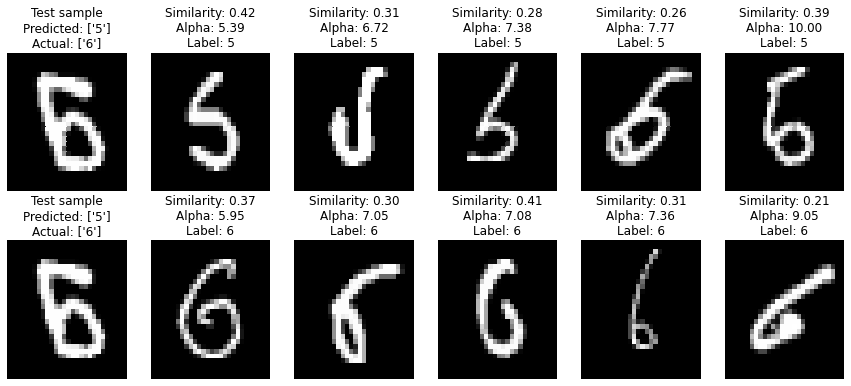

In [ ]:
figure = plt.figure(figsize=(15,6));

plt.subplot(2, n_sv+1, 1);

sns.heatmap(np.reshape(X_test_bin[idx_test], (28,28)), cmap=plt.cm.gray,
             xticklabels=False, yticklabels=False, cbar=False);
plt.title("Test sample\nPredicted: %s\nActual: %s" % (y_pred_bin[idx_test],y_test_bin[idx_test]));

for i, idx in enumerate(sv_c1):
  plt.subplot(2, n_sv+1, i+1+1);
  sns.heatmap(np.reshape(X_train_bin[idx_support_c1[idx]], (28,28)), cmap=plt.cm.gray,
            xticklabels=False, yticklabels=False, cbar=False);
  plt.axis('off');
  plt.title("Similarity: %0.2f\nAlpha: %0.2f\nLabel: %s" % (similarity_c1[idx],
                                                            np.abs(dual_coef_c1.ravel()[idx]),
                                                            y_train_bin[idx_support_c1[idx]]));

plt.subplot(2, n_sv+1, n_sv+1+1);

sns.heatmap(np.reshape(X_test_bin[idx_test], (28,28)), cmap=plt.cm.gray,
             xticklabels=False, yticklabels=False, cbar=False);
plt.title("Test sample\nPredicted: %s\nActual: %s" % (y_pred_bin[idx_test],y_test_bin[idx_test]));

for i, idx in enumerate(sv_c2):
  plt.subplot(2, n_sv+1, n_sv+i+1+1+1);
  sns.heatmap(np.reshape(X_train_bin[idx_support_c2[idx]], (28,28)), cmap=plt.cm.gray,
            xticklabels=False, yticklabels=False, cbar=False);
  plt.axis('off');
  plt.title("Similarity: %0.2f\nAlpha: %0.2f\nLabel: %s" % (similarity_c2[idx],
                                                            np.abs(dual_coef_c2.ravel()[idx]),
                                                            y_train_bin[idx_support_c2[idx]]));

plt.subplots_adjust(hspace=0.35);
plt.show();
